In [8]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem.Draw import IPythonConsole
import csv

with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

with open('Epidermal_growth_factor_receptor_erbB1_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    EGFR_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]
    
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [17:58:52] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [17:58:52] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [17:58:52] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [17:58:53] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:58:53] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [17:58:53] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [17:58:53] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [17:58:53] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [17:58:53] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [17:58:53] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit ERROR: [17:58:53] ERROR: Could not sanitize molecule ending on line 261581
RDKit ERROR

In [18]:
def too_many_hbd(mol):
    # takes an RDKit mol instance, returns True if the structure is out of LRO5 bounds
    return rdescriptors.CalcNumLipinskiHBD(mol) > 5

def too_many_hba(mol):
    return rdescriptors.CalcNumLipinskiHBA(mol) > 10

def too_heavy(mol):
    return rdescriptors.CalcExactMolWt(mol) > 500

def too_greasy(mol):
    return Descriptors.MolLogP(mol) > 5

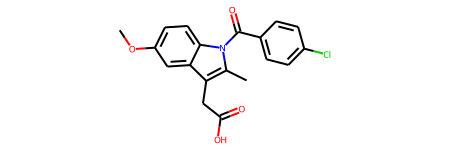

In [19]:
ml = EGFR_ligands[2307]
ml

In [20]:
# and see how the structure fares
too_many_hbd(ml), too_many_hba(ml), \
too_heavy(ml), too_greasy(ml)

(False, False, False, False)

My random ligand passes LRO5.

#### mtor

In [21]:
mtor_ligands_too_many_hbd = [too_many_hbd(l) for l in mtor_ligands]
mtor_ligands_too_many_hba = [too_many_hba(l) for l in mtor_ligands]
mtor_ligands_too_heavy = [too_heavy(l) for l in mtor_ligands]
mtor_ligands_too_greasy = [too_greasy(l) for l in mtor_ligands]
sum(mtor_ligands_too_many_hbd), sum(mtor_ligands_too_many_hba), \
sum(mtor_ligands_too_heavy), sum(mtor_ligands_too_greasy), len(mtor_ligands)

(7, 850, 1357, 223, 4596)

#### EGFR

In [22]:
EGFR_ligands_too_many_hbd = [too_many_hbd(l) for l in EGFR_ligands]
EGFR_ligands_too_many_hba = [too_many_hba(l) for l in EGFR_ligands]
EGFR_ligands_too_heavy = [too_heavy(l) for l in EGFR_ligands]
EGFR_ligands_too_greasy = [too_greasy(l) for l in EGFR_ligands]
sum(EGFR_ligands_too_many_hbd), sum(EGFR_ligands_too_many_hba), \
sum(EGFR_ligands_too_heavy), sum(EGFR_ligands_too_greasy), len(EGFR_ligands)

(218, 1123, 4183, 4198, 14362)

Most of the molecules within my set pass RO5. 218 molecules have too many hydrogen bond donors and 1123 molecules have too many hydrogen bond acceptors. There are 4183 of too heavy ligands and 4198 of too greasy ones.

#### mtor

In [23]:
import pandas as pd
df = pd.DataFrame(data={'set':'mtor',
                        'too_many_hbd': mtor_ligands_too_many_hbd,
                        'too_many_hba': mtor_ligands_too_many_hba,
                        'too_greasy': mtor_ligands_too_greasy,
                        'too_heavy': mtor_ligands_too_heavy})
df

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy
0,mtor,False,False,False,False
1,mtor,False,False,False,False
2,mtor,False,False,False,False
3,mtor,False,False,False,False
4,mtor,False,False,False,False
...,...,...,...,...,...
4591,mtor,False,False,False,False
4592,mtor,False,False,False,False
4593,mtor,False,False,False,False
4594,mtor,False,False,False,False


#### EGFR

In [24]:
df1 = pd.DataFrame(data={'set':'EGFR',
                        'too_many_hbd': EGFR_ligands_too_many_hbd,
                        'too_many_hba': EGFR_ligands_too_many_hba,
                        'too_greasy': EGFR_ligands_too_greasy,
                        'too_heavy': EGFR_ligands_too_heavy})
df1

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy
0,EGFR,False,False,False,True
1,EGFR,False,False,True,False
2,EGFR,False,True,False,True
3,EGFR,False,False,True,True
4,EGFR,False,False,True,True
...,...,...,...,...,...
14357,EGFR,False,False,True,False
14358,EGFR,False,False,False,False
14359,EGFR,False,False,False,False
14360,EGFR,False,False,False,False


#### mtor

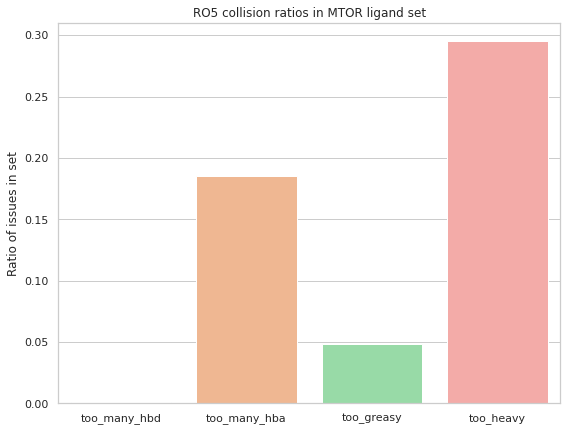

In [25]:
import seaborn as sns
sns.set(rc={'figure.figsize':(9, 7)})
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df, ci=None, palette='pastel')
    p.set_title("RO5 collision ratios in MTOR ligand set")
    p.set_ylabel("Ratio of issues in set")

#### EGFR

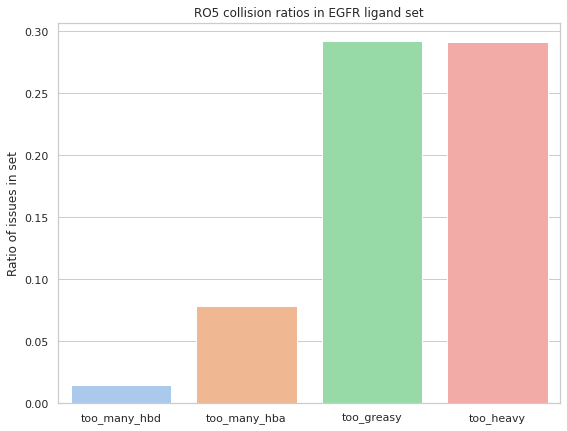

In [26]:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df1, ci=None, palette='pastel')
    p.set_title("RO5 collision ratios in EGFR ligand set")
    p.set_ylabel("Ratio of issues in set")

The main problem with the ligands from my dataset is that almost 30% are too heavy and too fat. In comparison to mtor dataset, there are more too greasy ligands and less ligands which have too many hba in the EGFR dataset.

In [27]:
def ro5_violations(mol):
    # takes RDKit mol, return how many rules it actually violates
    return sum([too_many_hbd(mol), too_many_hba(mol), too_heavy(mol), too_greasy(mol)])

def violates_lipinski(mol):
    # checks the number of RO5 violations, if they are more than one, return True
    return ro5_violations(mol) > 1

#### mtor

In [28]:
# let's apply those functions on our mtor set:
mtor_ro5_violations = [ro5_violations(l) for l in mtor_ligands]
mtor_violates_lipinski = [violates_lipinski(l) for l in mtor_ligands]
sum(mtor_ro5_violations),\
sum(mtor_ro5_violations)/len(mtor_ro5_violations),\
sum(mtor_violates_lipinski),\
sum(mtor_violates_lipinski)/len(mtor_violates_lipinski)

(2437, 0.5302436901653612, 768, 0.1671018276762402)

#### EGFR

In [29]:
EGFR_ro5_violations = [ro5_violations(l) for l in EGFR_ligands]
EGFR_violates_lipinski = [violates_lipinski(l) for l in EGFR_ligands]
sum(EGFR_ro5_violations),\
sum(EGFR_ro5_violations)/len(EGFR_ro5_violations),\
sum(EGFR_violates_lipinski),\
sum(EGFR_violates_lipinski)/len(EGFR_violates_lipinski)

(9722, 0.6769252193287842, 3023, 0.21048600473471663)

The total number of RO5 violations in the EGFR set is 9722, which is 0.68 RO5 violations per molecule. 3023 of my ligands (21%) violate more than one LRO5 rule.

#### mtor

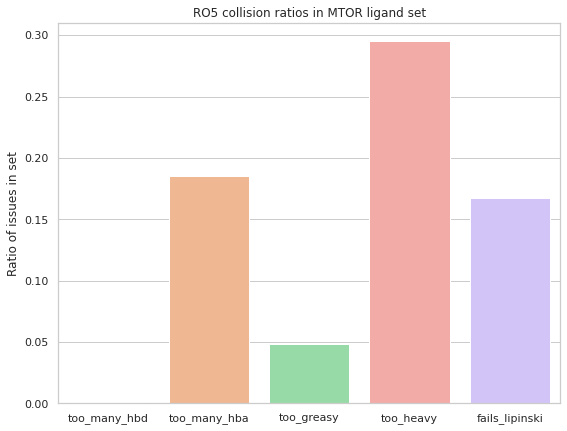

In [30]:
df['fails_lipinski'] = mtor_violates_lipinski
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df, ci=None, palette='pastel')
    p.set_title("RO5 collision ratios in MTOR ligand set")
    p.set_ylabel("Ratio of issues in set")

#### EGFR

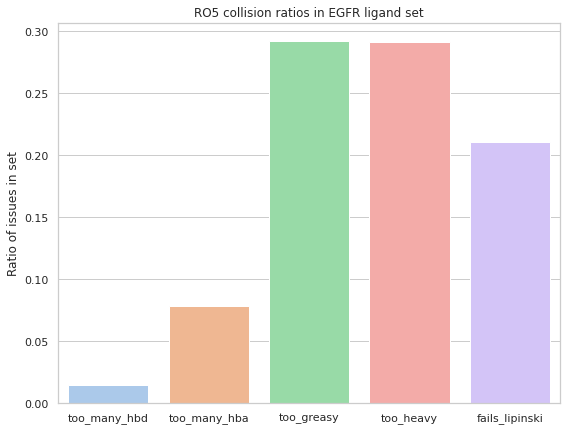

In [31]:
df1['fails_lipinski'] = EGFR_violates_lipinski
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df1, ci=None, palette='pastel')
    p.set_title("RO5 collision ratios in EGFR ligand set")
    p.set_ylabel("Ratio of issues in set")

In [32]:
from rdkit.Chem import Crippen

def bad_greasyness_ghose(mol):
    logp = Descriptors.MolLogP(mol)
    return logp > 5.6 or logp < -0.4

# let's apply the filters and add them to the dataframe as we go
df['odd_greasyness'] = [bad_greasyness_ghose(l) for l in mtor_ligands]

def bad_refractivity_ghose(mol):
    ref = Crippen.MolMR(mol)
    return ref > 130 or ref < 40
df['odd_refractivity'] = [bad_refractivity_ghose(l) for l in mtor_ligands]

def bad_mw_ghose(mol):
    mw = rdescriptors.CalcExactMolWt(mol)
    return mw > 480 or mw < 180
df['odd_mass'] = [bad_mw_ghose(l) for l in mtor_ligands]

def bad_atomcount_ghose(mol):
    ac = mol.GetNumHeavyAtoms()
    return ac > 70 or ac < 20
df['odd_atomcount'] = [bad_atomcount_ghose(l) for l in mtor_ligands]

def violates_ghose(mol):
    return bad_greasyness_ghose(mol) or bad_refractivity_ghose(mol) or bad_mw_ghose(mol) or bad_atomcount_ghose(mol)
df['fails_ghose'] = [violates_ghose(l) for l in mtor_ligands]

def too_rotatable_veber(mol):
    return Chem.CalcNumRotatableBonds(mol) > 10
df['too_rotatable'] = [too_rotatable_veber(l) for l in mtor_ligands]

def too_large_psa_veber(mol):
    return rdescriptors.CalcTPSA(mol) > 140
df['excessive_psa'] = [too_large_psa_veber(l) for l in mtor_ligands]

def violates_veber(mol):
    return too_rotatable_veber(mol) or too_large_psa_veber(mol)
df['fails_veber'] = [violates_veber(l) for l in mtor_ligands]

In [33]:
# EGFR
df1['odd_greasyness'] = [bad_greasyness_ghose(l) for l in EGFR_ligands]
df1['odd_refractivity'] = [bad_refractivity_ghose(l) for l in EGFR_ligands]
df1['odd_mass'] = [bad_mw_ghose(l) for l in EGFR_ligands]
df1['odd_atomcount'] = [bad_atomcount_ghose(l) for l in EGFR_ligands]
df1['fails_ghose'] = [violates_ghose(l) for l in EGFR_ligands]
df1['too_rotatable'] = [too_rotatable_veber(l) for l in EGFR_ligands]
df1['excessive_psa'] = [too_large_psa_veber(l) for l in EGFR_ligands]
df1['fails_veber'] = [violates_veber(l) for l in EGFR_ligands]

#### mtor

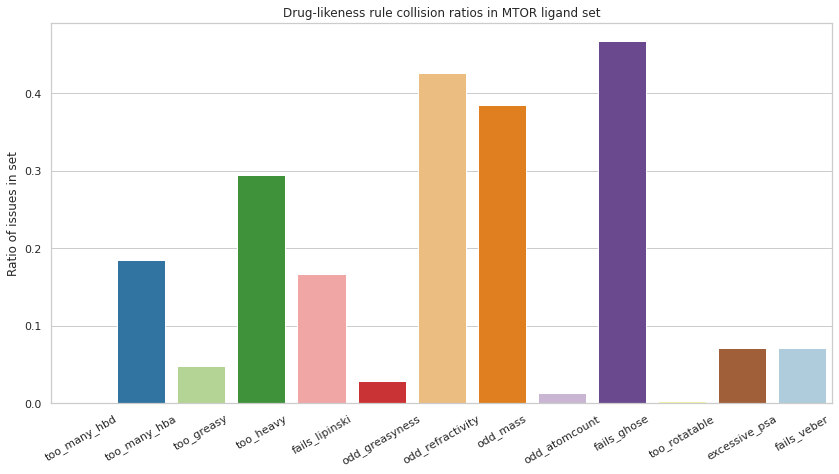

In [34]:
sns.set(rc={'figure.figsize':(14, 7)})
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df, ci=None, palette='Paired')
    p.set_title("Drug-likeness rule collision ratios in MTOR ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30) # avoid ugly text clipping

#### EGFR

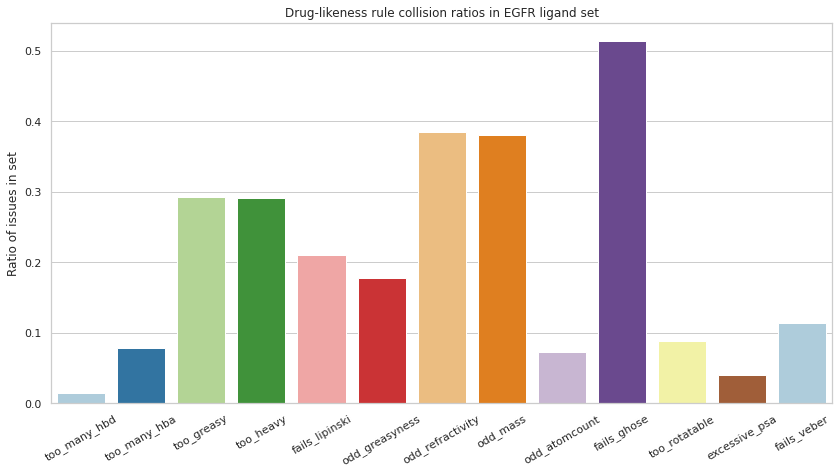

In [35]:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df1, ci=None, palette='Paired')
    p.set_title("Drug-likeness rule collision ratios in EGFR ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30)

More than 50% of ligands fail the ghose test, more than 30% have bad refractivity and bad molecular weight, more than 20% are too heavy, too greasy and fail lipinski.

#### drugbank

In [36]:
df_drugbank = pd.DataFrame(
    data={'set':'DrugBank',
          'too_many_hbd': [too_many_hbd(l) for l in drugs],
          'too_many_hba': [too_many_hba(l) for l in drugs],
          'too_greasy': [too_greasy(l) for l in drugs],
          'too_heavy': [too_heavy(l) for l in drugs],
          'fails_lipinski': [violates_lipinski(l) for l in drugs],
          'odd_greasyness': [bad_greasyness_ghose(l) for l in drugs],
          'odd_refractivity': [bad_refractivity_ghose(l) for l in drugs],
          'odd_mass': [bad_mw_ghose(l) for l in drugs],
          'odd_atomcount': [bad_atomcount_ghose(l) for l in drugs],
          'fails_ghose': [violates_ghose(l) for l in drugs],
          'too_rotatable': [too_rotatable_veber(l) for l in drugs],
          'excessive_psa': [too_large_psa_veber(l) for l in drugs],
          'fails_veber': [violates_veber(l) for l in drugs]})
df_drugbank

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy,fails_lipinski,odd_greasyness,odd_refractivity,odd_mass,odd_atomcount,fails_ghose,too_rotatable,excessive_psa,fails_veber
0,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
1,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
2,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
3,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
4,DrugBank,False,True,False,True,True,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110,DrugBank,False,False,False,False,False,False,True,True,True,True,False,False,False
7111,DrugBank,False,False,False,False,False,True,False,False,False,True,False,True,True
7112,DrugBank,True,True,False,True,True,False,True,True,True,True,True,True,True
7113,DrugBank,False,False,False,False,False,False,False,False,False,False,True,False,True


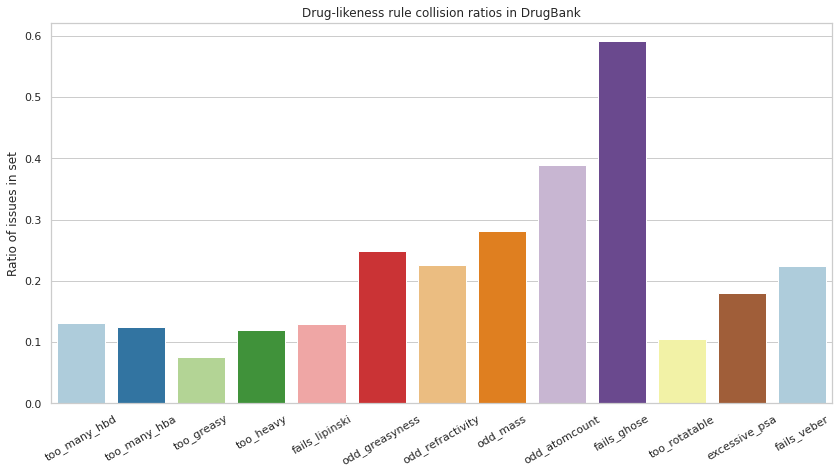

In [37]:
# let's visualize this monstrosity:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df_drugbank, ci=None, palette='Paired')
    p.set_title("Drug-likeness rule collision ratios in DrugBank")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30) # avoid ugly text clipping

 Analysis of drugbank dataset with the same filters shows that this dataset isn't perfect either.

#### Comparison of mtor, EGFR and drugbank datasets.

In [38]:
joint_df = pd.concat([df.sum(), df1.sum(),  df_drugbank.sum()], ignore_index=True, axis=1)

for i, a in enumerate(['mtor', 'EGFR', 'DrugBank']):
    joint_df[i]['set'] = a

joint_df.reset_index(inplace=True)
joint_df.columns = joint_df.iloc[0]
joint_df = joint_df.drop([0], axis=0)

joint_df['mtor'] = joint_df['mtor'].div(len(mtor_ligands))
joint_df['DrugBank'] = joint_df['DrugBank'].div(len(drugs))
joint_df['EGFR'] = joint_df['EGFR'].div(len(EGFR_ligands))

joint_df

melted = pd.melt(joint_df, id_vars=['set'], value_vars=['mtor', 'EGFR', 'DrugBank'])
melted.columns = ['filt', 'set', 'value']
melted

,filt,set,value
0,too_many_hbd,mtor,0.001523
1,too_many_hba,mtor,0.184943
2,too_greasy,mtor,0.04852
3,too_heavy,mtor,0.295257
4,fails_lipinski,mtor,0.167102
5,odd_greasyness,mtor,0.028721
6,odd_refractivity,mtor,0.425805
7,odd_mass,mtor,0.384682
8,odd_atomcount,mtor,0.013272
9,fails_ghose,mtor,0.467581


Let's visualize distinct filters for each dataset for comparison.

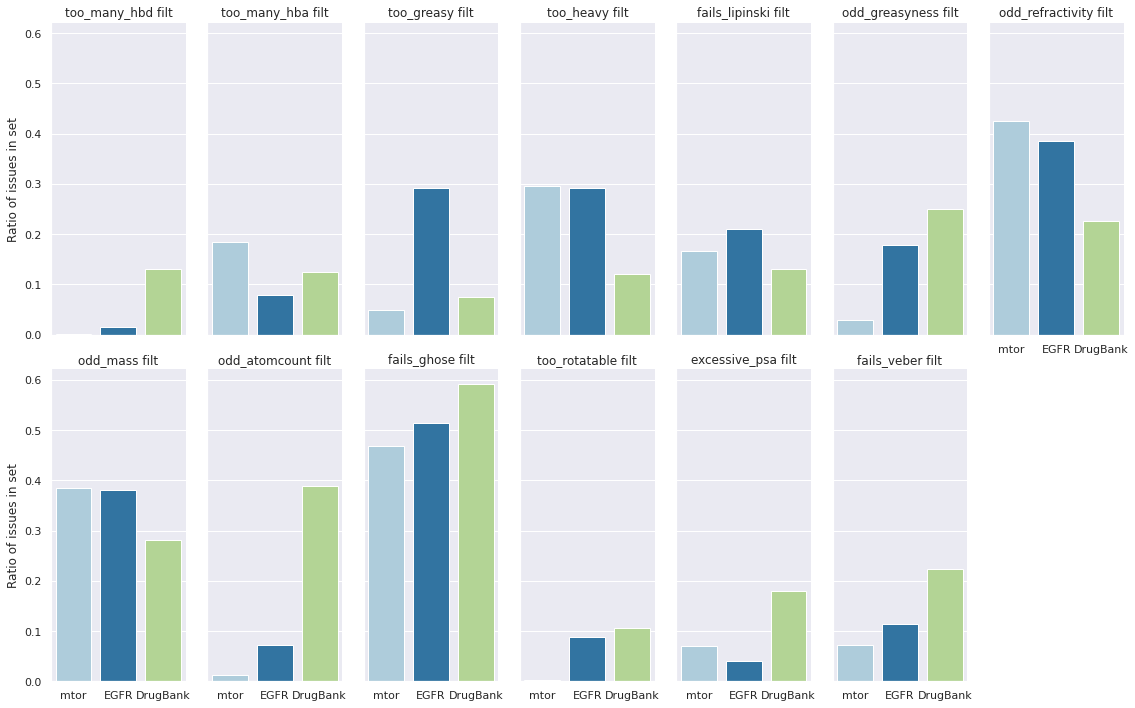

In [39]:
aa = sns.catplot(x="set", y="value", col="filt", aspect=.45, data=melted, kind="bar", col_wrap=7, ci=None, palette='Paired')
aa.set_axis_labels("", "Ratio of issues in set")
aa.set_xticklabels(["mtor", "EGFR", "DrugBank"])
aa.set_titles("{col_name} {col_var}")


By almost all filters, the dataset of EGFR takes intermediate values between other datasets, with the exception of too_greasy.

#### additional filters

In [41]:
def my_too_many_hbd(mol):
    # takes an RDKit mol instance, returns True if the structure is out of LRO5 bounds
    return rdescriptors.CalcNumLipinskiHBD(mol) > 3

def my_too_many_hba(mol):
    return rdescriptors.CalcNumLipinskiHBA(mol) > 3

def my_too_heavy(mol):
    return rdescriptors.CalcExactMolWt(mol) > 300

def my_too_greasy(mol):
    return Descriptors.MolLogP(mol) > 3

def my_too_rotatable(mol):
    return Chem.CalcNumRotatableBonds(mol) > 3

In [42]:
df_all = pd.DataFrame(columns=['filter', 'set', 'value'])
names = ['mtor_ligands', 'EGFR_ligands', 'drugs']
i = 0
for ind, sett in enumerate((mtor_ligands, EGFR_ligands, drugs)):
    for descr in [my_too_many_hbd, my_too_many_hba, my_too_greasy, my_too_heavy, my_too_rotatable]:
        df_all.loc[i] = [descr.__name__, str(names[ind]), sum([descr(l) for l in sett])/len(sett)]
        i += 1

df_all

,filter,set,value
0,my_too_many_hbd,mtor_ligands,0.085944
1,my_too_many_hba,mtor_ligands,0.993690
2,my_too_greasy,mtor_ligands,0.528938
3,my_too_heavy,mtor_ligands,0.967363
4,my_too_rotatable,mtor_ligands,0.715622
5,my_too_many_hbd,EGFR_ligands,0.107227
6,my_too_many_hba,EGFR_ligands,0.941930
7,my_too_greasy,EGFR_ligands,0.834285
8,my_too_heavy,EGFR_ligands,0.893121
9,my_too_rotatable,EGFR_ligands,0.805807


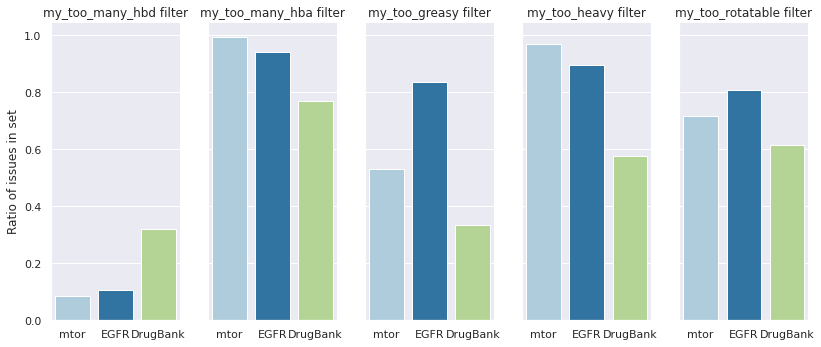

In [43]:
aa = sns.catplot(x="set", y="value", col="filter", aspect=.45, data=df_all, kind="bar", ci=None, palette='Paired')
aa.set_axis_labels("", "Ratio of issues in set")
aa.set_xticklabels(["mtor", "EGFR", "DrugBank"])
aa.set_titles("{col_name} {col_var}")

More than 80% of ligands do not pass through more stringent filters. Filter "too_many_hdb" does not pass more than 20% of ligands from my dataset. The biggest mismatch between my ligands and drugs is when using the "too_greasy" filter.